# 0.1 Setting up the Data

In [ ]:
# prompt: Load google drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
%cd /content/drive/MyDrive/6000_01/Week 5 (24 09 2024)

/content/drive/MyDrive/6000_01/Week 5 (24 09 2024)


In [ ]:
%cd Datasets/

/content/drive/MyDrive/6000_01/Week 5 (24 09 2024)/Datasets


In [ ]:
ls

online+retail+ii.zip  retail_data/  retail_data.csv


# 0.2 Read in the Data

In [ ]:
%cd retail_data

/content/drive/MyDrive/6000_01/Week 5 (24 09 2024)/Datasets/retail_data


In [ ]:
ls

master_df.csv  online_retail_II.xlsx  rfm_data.csv


In [ ]:
import pandas as pd

In [ ]:
df_0 = pd.read_excel('online_retail_II.xlsx', sheet_name = 0)

In [ ]:
df_1 = pd.read_excel('online_retail_II.xlsx', sheet_name = 1)

In [ ]:
master_df = pd.concat([df_0, df_1])

0.3 RFM Calculation using lifetime

In [ ]:
df = master_df.copy(deep = True)

In [ ]:
print("There are", df.shape[0], "rows.")

There are 1067371 rows.


In [ ]:
df.isnull().sum()

,0
Invoice,0
StockCode,0
Description,4382
Quantity,0
InvoiceDate,0
Price,0
Customer ID,243007
Country,0


In [ ]:
df = df.dropna(subset = ['Customer ID'])

In [ ]:
print("There are", df.shape[0], "rows.")

There are 824364 rows.


In [ ]:
# Remove negative quantities
df = df[df['Quantity'] > 0]

In [ ]:
df.duplicated().sum()
df = df.drop_duplicates()

In [ ]:
print("There are", df.shape[0], "rows.")

There are 779495 rows.


In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
df['Customer ID'] = df['Customer ID'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 779495 entries, 0 to 541909
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      779495 non-null  object        
 1   StockCode    779495 non-null  object        
 2   Description  779495 non-null  object        
 3   Quantity     779495 non-null  int64         
 4   InvoiceDate  779495 non-null  datetime64[ns]
 5   Price        779495 non-null  float64       
 6   Customer ID  779495 non-null  int64         
 7   Country      779495 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 53.5+ MB


In [ ]:
import datetime

# Convert TransactionDate to datetime format
df['TransactionDate'] = pd.to_datetime(df['InvoiceDate'])

# Create CurrentDate variable
currentDate = datetime.datetime(2024, 10, 8)

In [ ]:
df.set_index('InvoiceDate', inplace = True)
df = df.sort_index()

In [ ]:
df.head()

,Invoice,StockCode,Description,Quantity,Price,Customer ID,Country,TransactionDate
InvoiceDate,,,,,,,,
2009-12-01 07:45:00,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,6.95,13085,United Kingdom,2009-12-01 07:45:00
2009-12-01 07:45:00,489434,79323P,PINK CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01 07:45:00
2009-12-01 07:45:00,489434,79323W,WHITE CHERRY LIGHTS,12,6.75,13085,United Kingdom,2009-12-01 07:45:00
2009-12-01 07:45:00,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2.10,13085,United Kingdom,2009-12-01 07:45:00
2009-12-01 07:45:00,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,1.25,13085,United Kingdom,2009-12-01 07:45:00


In [ ]:
# Install and import the lifetimes package

!pip install lifetimes

import lifetimes

In [ ]:
from lifetimes.utils import summary_data_from_transaction_data

# Calculate recency, frequency, and monetary value
rfm = summary_data_from_transaction_data(df,
                                         'Customer ID',
                                         'TransactionDate',
                                         monetary_value_col='Price',
                                         observation_period_end=currentDate)

print(rfm.head())

             frequency  recency       T  monetary_value
Customer ID                                            
12346              7.0    400.0  5412.0       27.700000
12347              7.0    402.0  5091.0       68.744286
12348              4.0    363.0  5125.0       44.677500
12349              3.0    571.0  5276.0      428.620000
12350              0.0      0.0  4997.0        0.000000


# 0.4 Specific Questions

In [ ]:
average_recency = rfm['recency'].mean()
average_frequency = rfm['frequency'].mean()
average_monetary_value = rfm['monetary_value'].mean()

print(f"Average Recency: {average_recency}")
print(f"Average Frequency: {average_frequency}")
print(f"Average Monetary Value: {average_monetary_value}")

Average Recency: 273.25420846794765
Average Frequency: 4.63033497704472
Average Monetary Value: 50.3174045218969


In [ ]:
# Sort the RFM dataframe by monetary_value in descending order
top_customers = rfm.sort_values('monetary_value', ascending=False).head(10)

print("Top 10 Customers based on Monetary Value:")
print(top_customers[['recency', 'frequency', 'monetary_value']])

Top 10 Customers based on Monetary Value:
             recency  frequency  monetary_value
Customer ID                                    
12536           16.0        1.0     8322.120000
14096           97.0       16.0     2081.990000
14063          293.0        7.0     1915.387143
12744          540.0        7.0     1881.391429
15480          560.0        3.0      817.083333
12378          433.0        1.0      656.440000
12669          106.0        2.0      615.595000
16072          261.0        2.0      554.765000
16521          233.0        1.0      545.780000
15502          539.0        9.0      478.392222


In [ ]:
# Calculating the average recency and frequency for this top 10 group
average_recency_top_customers = top_customers['recency'].mean()
average_frequency_top_customers = top_customers['frequency'].mean()

print(f"\nAverage Recency for Top 10 Customers: {average_recency_top_customers}")
print(f"Average Frequency for Top 10 Customers: {average_frequency_top_customers}")


Average Recency for Top 10 Customers: 307.8
Average Frequency for Top 10 Customers: 4.9


# 0.5 RFM Scoring

In [ ]:
# Assign scores for Recency, Frequency, and Monetary Value
quantiles = rfm[['frequency', 'recency', 'monetary_value']].quantile([0.2, 0.4, 0.6, 0.8]).to_dict()

def r_score(x):
    if x <= quantiles['recency'][0.2]:
        return 1
    elif x <= quantiles['recency'][0.4]:
        return 2
    elif x <= quantiles['recency'][0.6]:
        return 3
    elif x <= quantiles['recency'][0.8]:
        return 4
    else:
        return 5

def fm_score(x, c):
    if x <= quantiles[c][0.2]:
        return 1
    elif x <= quantiles[c][0.4]:
        return 2
    elif x <= quantiles[c][0.6]:
        return 3
    elif x <= quantiles[c][0.8]:
        return 4
    else:
        return 5

rfm['r_quartile'] = rfm['recency'].apply(lambda x: r_score(x))
rfm['f_quartile'] = rfm['frequency'].apply(lambda x: fm_score(x, 'frequency'))
rfm['m_quartile'] = rfm['monetary_value'].apply(lambda x: fm_score(x, 'monetary_value'))

# Combine the scores into a single RFM score
rfm['rfm_score'] = rfm.r_quartile.map(str) + rfm.f_quartile.map(str) + rfm.m_quartile.map(str)

print(rfm.head(10))

             frequency  recency       T  monetary_value  r_quartile  \
Customer ID                                                           
12346              7.0    400.0  5412.0       27.700000           4   
12347              7.0    402.0  5091.0       68.744286           4   
12348              4.0    363.0  5125.0       44.677500           4   
12349              3.0    571.0  5276.0      428.620000           4   
12350              0.0      0.0  4997.0        0.000000           1   
12351              0.0      0.0  5062.0        0.000000           1   
12352              8.0    356.0  5079.0      174.532500           4   
12353              1.0    204.0  5095.0       24.300000           3   
12354              0.0      0.0  4919.0        0.000000           1   
12355              1.0    353.0  5254.0       54.650000           3   

             f_quartile  m_quartile rfm_score              segment  
Customer ID                                                         
12346    

# 0.6 Segmentation

In [ ]:
def segment_customers(rfm_score):
  if rfm_score in ['545', '555', '554', '454', '455', '445']:
    return 'Champions'
  elif rfm_score in ['345', '355', '354', '444', '435']:
    return 'Potential Loyalists'
  elif rfm_score in ['451', '452', '453', '541', '542']:
    return 'At Risk'
  elif rfm_score in ['111', '112', '121', '122', '123', '132', '211', '212', '221']:
    return 'Lost Customers'
  else:
    return 'Other'

rfm['segment'] = rfm['rfm_score'].apply(lambda x: segment_customers(x))

print(rfm.head(10))

             frequency  recency       T  monetary_value  r_quartile  \
Customer ID                                                           
12346              7.0    400.0  5412.0       27.700000           4   
12347              7.0    402.0  5091.0       68.744286           4   
12348              4.0    363.0  5125.0       44.677500           4   
12349              3.0    571.0  5276.0      428.620000           4   
12350              0.0      0.0  4997.0        0.000000           1   
12351              0.0      0.0  5062.0        0.000000           1   
12352              8.0    356.0  5079.0      174.532500           4   
12353              1.0    204.0  5095.0       24.300000           3   
12354              0.0      0.0  4919.0        0.000000           1   
12355              1.0    353.0  5254.0       54.650000           3   

             f_quartile  m_quartile rfm_score              segment  
Customer ID                                                         
12346    

# 0. 7 Visualizations

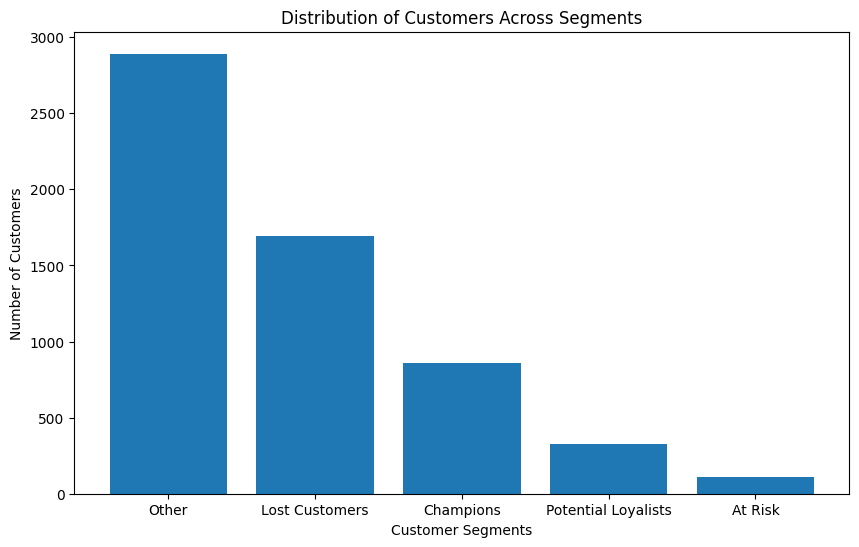

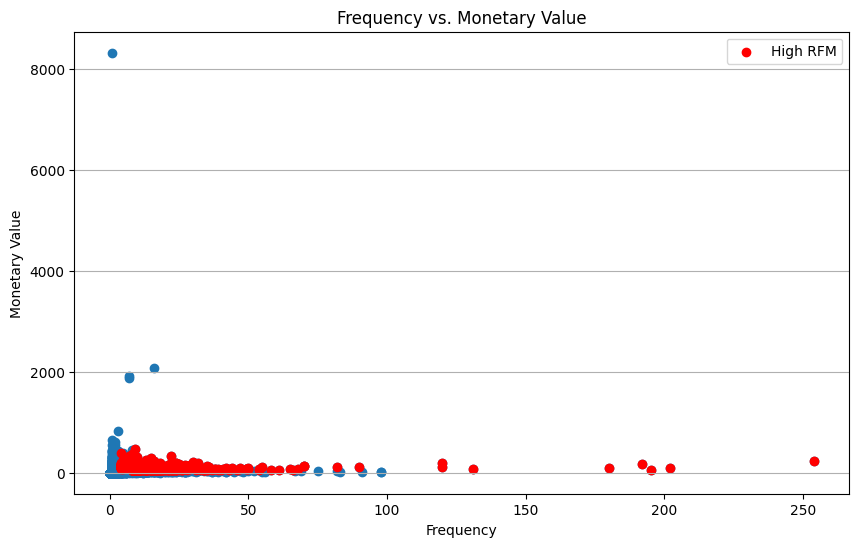

In [ ]:
import matplotlib.pyplot as plt

# Bar Chart: Distribution of customers across segments
segment_counts = rfm['segment'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(segment_counts.index, segment_counts.values)
plt.xlabel('Customer Segments')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customers Across Segments')
plt.show()

# Scatter Plot: Frequency vs. Monetary Value
plt.figure(figsize=(10, 6))
plt.scatter(rfm['frequency'], rfm['monetary_value'])
plt.xlabel('Frequency')
plt.ylabel('Monetary Value')
plt.title('Frequency vs. Monetary Value')

# Highlight customers with the highest RFM scores
high_rfm_customers = rfm[rfm['rfm_score'].isin(['555', '554', '545', '455', '454'])]
plt.scatter(high_rfm_customers['frequency'], high_rfm_customers['monetary_value'], color='red', label='High RFM')
plt.legend()
plt.grid(True, axis='y')  # Add grid lines only for the y-axis
plt.show()